# PCA (주성분분석)

2d 에서 1d로 차원 감소 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# matplotlib setting
%matplotlib inline

In [2]:
mean = [20, 20]
cov = [
    [7, 2],
    [2, 6]
]

original_vectors = np.random.multivariate_normal(mean, cov, 100)

In [3]:
# recenter vectors
mean_x = np.mean(original_vectors, axis=0)
vectors = original_vectors - mean_x

mean_x = np.mean(vectors, axis=0)
print("mean(almost zero):\n", mean_x)

cov_x = np.cov(np.transpose(vectors))
print("covariance:\n", cov_x)

eigen_values, eigen_vectors = np.linalg.eig(cov_x)
print("eigen values:\n", eigen_values)
print("eigen vectors:\n", eigen_vectors)

print("max eigen value (argmax):\n", np.argmax(eigen_values))
print("max eigen vector (argmax):\n", eigen_vectors[np.argmax(eigen_values)])

mean(almost zero):
 [-7.14095449e-15  7.85149723e-15]
covariance:
 [[6.43453407 2.50162507]
 [2.50162507 6.36137569]]
eigen values:
 [8.89984737 3.89606239]
eigen vectors:
 [[ 0.71225719 -0.70191858]
 [ 0.70191858  0.71225719]]
max eigen value (argmax):
 0
max eigen vector (argmax):
 [ 0.71225719 -0.70191858]


In [4]:
transformed_vectors = np.matmul(vectors, np.transpose(eigen_vectors))

Text(0.5,1,'transformed random vectors')

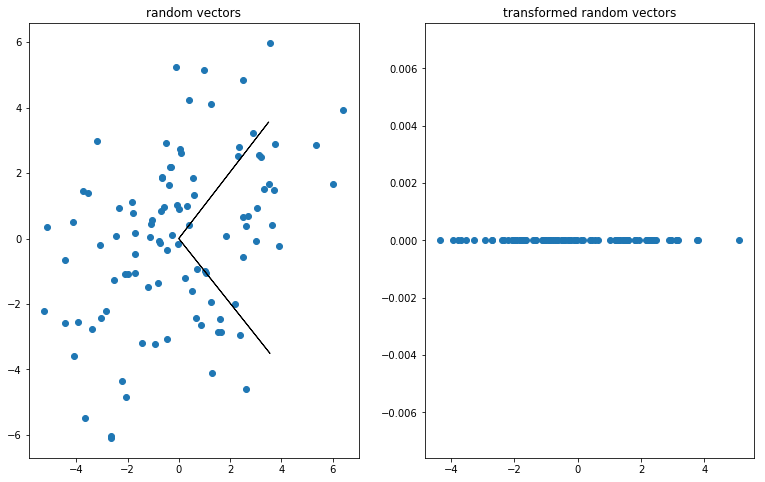

In [5]:
fig = plt.figure(figsize=(13, 8))

plot1 = fig.add_subplot(121)
plot2 = fig.add_subplot(122)

plot1.scatter(
    vectors[:,0],
    vectors[:,1])
plot1.set_title("random vectors")

for vector in eigen_vectors:
    plot1.arrow(0, 0, vector[0] * 5, vector[1] * 5)

plot2.scatter(
    transformed_vectors[:,0],
    np.zeros(transformed_vectors[:,0].shape))
plot2.set_title("transformed random vectors")